# K Means Clustering

K Means clustering is powerful for finding pattern in an unsupervised learning problem. The algorithm is given as:
1. A random k set of points are chosen as centroids. K is the number of clusters the datasets must be resolved into
2. Each datapoint is assigned the centroid which is closest to it.
3. New centroids are calculated by averaging the position of datapoints of a particular cluster.
4. Steps 3 and 4 are repeated iteratively until the centroid positions do not move.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from copy import deepcopy
plt.rcParams['figure.figsize'] = (9, 6)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/xclara.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


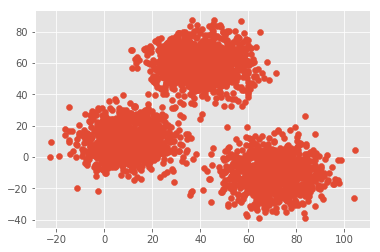

In [3]:
plt.scatter(data.V1, data.V2)

In [4]:
class kmeans():
    def __init__(self, k):
        self.k = k
        
    def form_clusters(self, x):
        # Given random centroid points, assign all data points to appropriate clusters
        centroids = self.form_centroids(x)
        oldCentroids = np.zeros(centroids.shape)
        # Cluster assignment for each data point
        clusters = np.zeros(len(x))
        # Error between old and new centroids
        error = self.distanceCentroids(centroids, oldCentroids)
        while error != 0:
            for i in range(len(x)):
                # set of distances of a data point to all given centroids
                distances = self.distanceToCentroids(centroids, x[i])
                clusters[i] = np.argmin(distances)
            oldCentroids = deepcopy(centroids)
            for i in range(self.k):
                points = [x[j] for j in range(len(x)) if clusters[j] == i]
                centroids[i] = np.mean(points, axis=0)
            error = self.distanceCentroids(centroids, oldCentroids)
        return clusters, centroids
        
    def form_centroids(self, x):
        centroids = x[np.random.randint(x.shape[0], size=self.k),:]
        return centroids
    
    # Error between the old centroid points and the new centroid points
    def distanceCentroids(self, centroids1, centroids2):
        error = 0
        for i in range(len(centroids1)):
            distance = self.getEuclideanDistance(centroids1[i], centroids2[i])
            error += distance
        return error
    
    # set of distances of a data point to all given centroids
    def distanceToCentroids(self, centroids, instance):
        distances = []
        for i in range(len(centroids)):
            distance = self.getEuclideanDistance(centroids[i],instance)
            distances.append(distance)
        return distances
        
    # For finding similarity between a test instance and a training instance
    def getEuclideanDistance(self, instance1, instance2):
        distance = 0 
        for i in range(len(instance1)):
            distance += pow((instance1[i] - instance2[i]), 2)
        return math.sqrt(distance)

In [5]:
X= pd.DataFrame.as_matrix(data)

In [6]:
kmeansObject = kmeans(3)
clusters, C = kmeansObject.form_clusters(X)

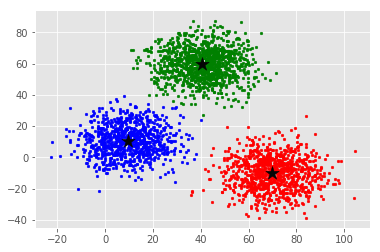

In [7]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [8]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids)

Centroid values
Scratch
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]
sklearn
[[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]


From the above, it is clear that the kMeans from scratch is the same as sklearn library implementation in terms of results.